In [3]:
import os
print(os.getcwd())


c:\Users\Alperen\Documents\GitHub\mobile_game_churn\notebooks


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_prep import load_data, level_selection, level_selection_index, total_ratio

ModuleNotFoundError: No module named 'src.data_prep'

In [ ]:
# import data
dev = load_data("dev.csv")
level_meta = load_data("level_meta.csv")
level_seq = load_data("level_seq.csv")
test = load_data("test.csv")
train = load_data("train.csv")

In [3]:
# check for missing values
level_seq.isna().sum()

user_id       0
level_id      0
f_success     0
f_duration    0
f_reststep    0
f_help        0
time          0
dtype: int64

In [4]:
# investigate level seq dataset
level_seq

,user_id,level_id,f_success,f_duration,f_reststep,f_help,time
0,10932,1,1,127.0,0.500000,0,2020-02-01 00:05:51
1,10932,2,1,69.0,0.703704,0,2020-02-01 00:08:01
2,10932,3,1,67.0,0.560000,0,2020-02-01 00:09:50
3,10932,4,1,58.0,0.700000,0,2020-02-01 00:11:16
4,10932,5,1,83.0,0.666667,0,2020-02-01 00:13:12
...,...,...,...,...,...,...,...
2194346,10931,40,1,111.0,0.250000,1,2020-02-03 16:26:37
2194347,10931,41,1,76.0,0.277778,0,2020-02-03 16:28:06
2194348,10931,42,0,121.0,0.000000,1,2020-02-03 16:30:17
2194349,10931,42,0,115.0,0.000000,0,2020-02-03 16:33:40


In [5]:
# describe the data
level_seq.describe()

,user_id,level_id,f_success,f_duration,f_reststep,f_help
count,2.194351e+06,2.194351e+06,2.194351e+06,2.194351e+06,2.194351e+06,2.194351e+06
mean,6.745030e+03,9.683600e+01,5.283216e-01,1.081228e+02,1.678471e-01,4.415565e-02
std,3.942094e+03,8.410689e+01,4.991974e-01,5.361323e+01,2.261460e-01,2.054409e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.287000e+03,4.100000e+01,0.000000e+00,7.700000e+01,0.000000e+00,0.000000e+00
50%,6.688000e+03,8.000000e+01,1.000000e+00,1.000000e+02,4.545455e-02,0.000000e+00
75%,1.016300e+04,1.420000e+02,1.000000e+00,1.270000e+02,2.857143e-01,0.000000e+00
max,1.358900e+04,1.509000e+03,1.000000e+00,6.000000e+02,1.000000e+00,1.000000e+00


In [6]:
# count how many distinct users are there 
print(f"Number of users: {len(level_seq['user_id'].unique())}")

Number of users: 13589


In [7]:
# group by the data on the level and succes situation and  also unstack the data
level_counts = level_seq.groupby(["level_id", "f_success"]).size().unstack()
level_counts

f_success,0,1
level_id,,
1,794.0,12964.0
2,171.0,12692.0
3,188.0,12600.0
4,127.0,12566.0
5,1188.0,12483.0
...,...,...
1505,NaN,1.0
1506,1.0,1.0
1507,6.0,1.0


In [8]:
# fill missing values due to unstack
level_counts.fillna(value = 0, inplace = True)
print(level_seq.isna().sum())
print(level_counts.isna().sum())


user_id       0
level_id      0
f_success     0
f_duration    0
f_reststep    0
f_help        0
time          0
dtype: int64
f_success
0    0
1    0
dtype: int64


In [9]:
# use total ratio function to count total, fail_raito and success_ratio for every level
level_counts = total_ratio(level_counts)
level_counts

f_success,0,1,total,fail_ratio,success_ratio
level_id,,,,,
1,794.0,12964.0,13758.0,0.057712,0.942288
2,171.0,12692.0,12863.0,0.013294,0.986706
3,188.0,12600.0,12788.0,0.014701,0.985299
4,127.0,12566.0,12693.0,0.010006,0.989994
5,1188.0,12483.0,13671.0,0.086899,0.913101
...,...,...,...,...,...
1505,0.0,1.0,1.0,0.000000,1.000000
1506,1.0,1.0,2.0,0.500000,0.500000
1507,6.0,1.0,7.0,0.857143,0.142857


In [10]:
# use level seletion function to investigate data levels closely
level_counts_0_100 = level_selection_index(level_counts, 0, 100, 1)
level_counts_700_800 = level_selection_index(level_counts, 700, 800, 1)
level_counts_1300_1500 = level_selection_index(level_counts, 1300, 1500, 1)

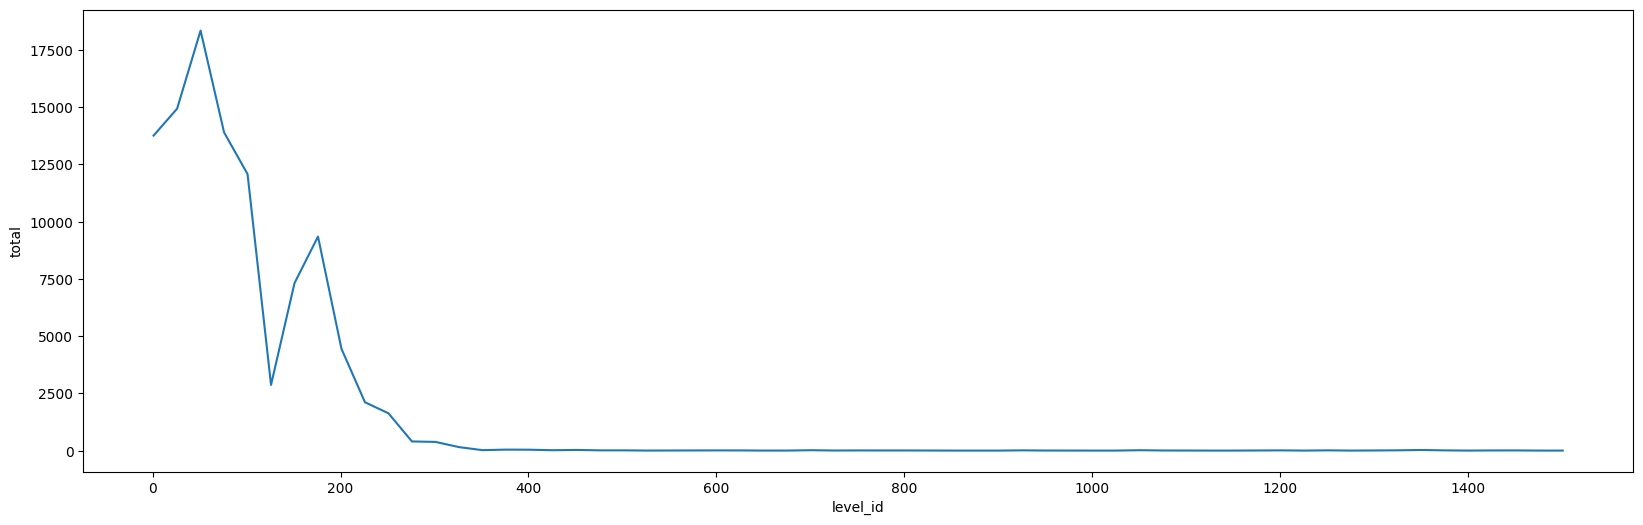

In [11]:
# plot the total playing attempts from beginning to last level increasing 25 leves.
level_all = level_selection_index(level_counts, 0, 1509, 25)

plt.figure(figsize=(20, 6))


sns.lineplot(
    x = level_all.index,
    y = "total",
    data = level_all
)

plt.show()

<Figure size 2000x800 with 0 Axes>

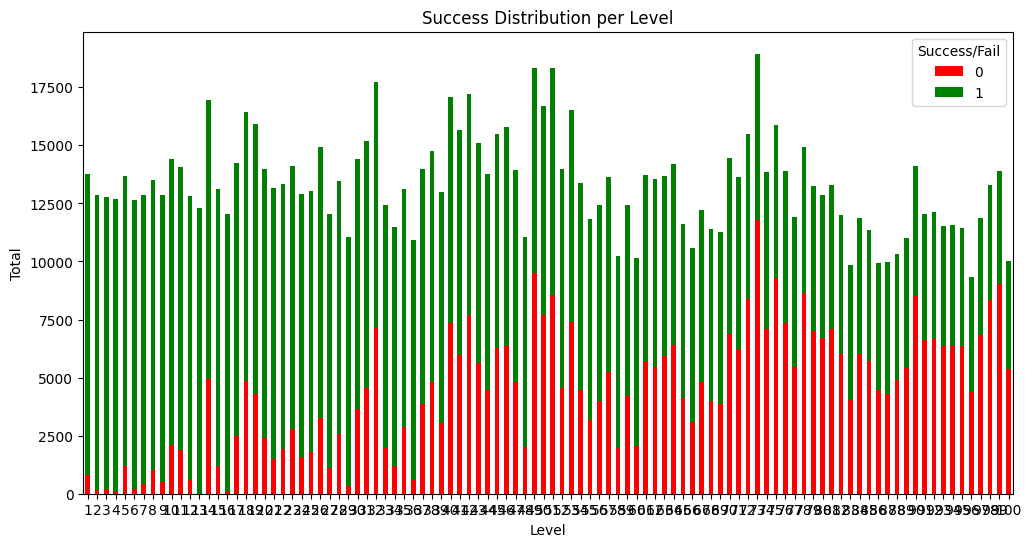

In [12]:
# plot the total attempts per level from 0 to 100 showing also success and fail attempts

plt.figure(figsize=(20, 8))

level_counts_0_100[[0, 1]].plot(
    kind="bar",
    stacked=True,
    color=["red", "green"],  
    figsize=(12, 6),
)

plt.xlabel("Level")
plt.ylabel("Total")
plt.title("Success Distribution per Level")
plt.xticks(rotation=0)  
plt.legend(title="Success/Fail")

plt.show()

<Figure size 2000x800 with 0 Axes>

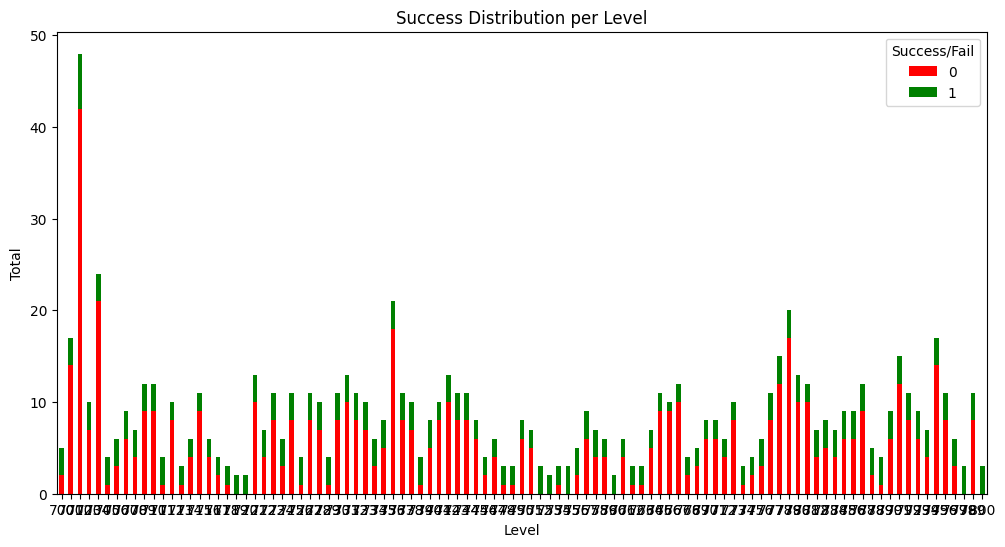

In [13]:
# plot the total attempts per level from 700 to 800 showing also success and fail attempts

plt.figure(figsize=(20, 8))

level_counts_700_800[[0, 1]].plot(
    kind="bar",
    stacked=True,
    color=["red", "green"],  
    figsize=(12, 6),
)

plt.xlabel("Level")
plt.ylabel("Total")
plt.title("Success Distribution per Level")
plt.xticks(rotation=0)  
plt.legend(title="Success/Fail")

plt.show()

As we can see there is big differnece in total playing attempts between first levels and later levels. Where is the break point?
Let's say our break point is Level 200.

In [14]:
# set  the levels before and after level 100.
before_100 = level_selection_index(level_counts, 0, 100, 10)
after_100 = level_selection_index(level_counts, 100, 1509, 15)

In [15]:
# calculate mean fail_ratio for before and after level 200
mean_after = after_100["fail_ratio"].mean()
mean_before = before_100["fail_ratio"].mean()   

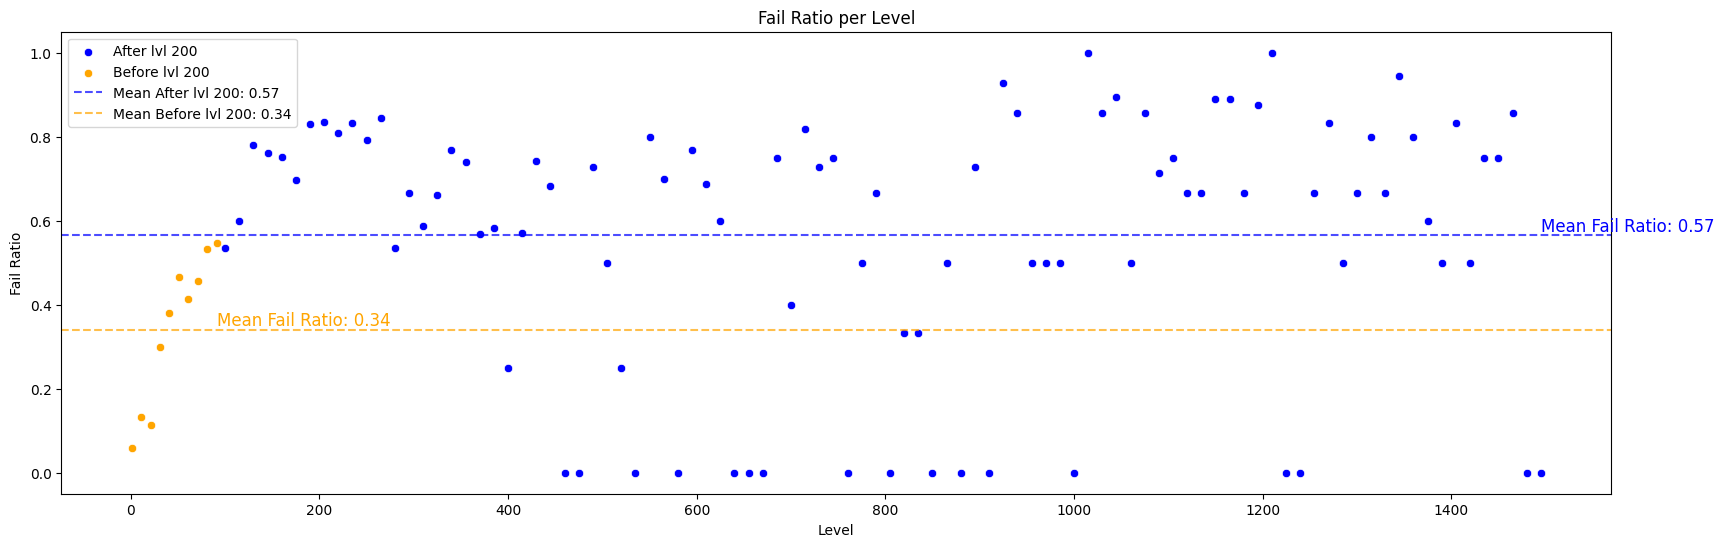

In [16]:
# What is our fail_ratio befor and after level 200?

plt.figure(figsize=(20,6))

sns.scatterplot(
    x=after_100.index,
    y="fail_ratio",
    data=after_100,
    color="b",
    label="After lvl 200"
)

sns.scatterplot(
    x=before_100.index,
    y="fail_ratio",
    data=before_100,
    color="orange",
    label="Before lvl 200"
)

plt.axhline(mean_after, color="b", linestyle="--", alpha=0.7, label=f"Mean After lvl 200: {mean_after:.2f}")
plt.axhline(mean_before, color="orange", linestyle="--", alpha=0.7, label=f"Mean Before lvl 200: {mean_before:.2f}")

plt.text(after_100.index.max(), mean_after, f"Mean Fail Ratio: {mean_after:.2f}", color="b", fontsize=12, verticalalignment="bottom")
plt.text(before_100.index.max(), mean_before, f"Mean Fail Ratio: {mean_before:.2f}", color="orange", fontsize=12, verticalalignment="bottom")


plt.xlabel("Level")
plt.ylabel("Fail Ratio")
plt.title("Fail Ratio per Level")
plt.legend()
plt.show()

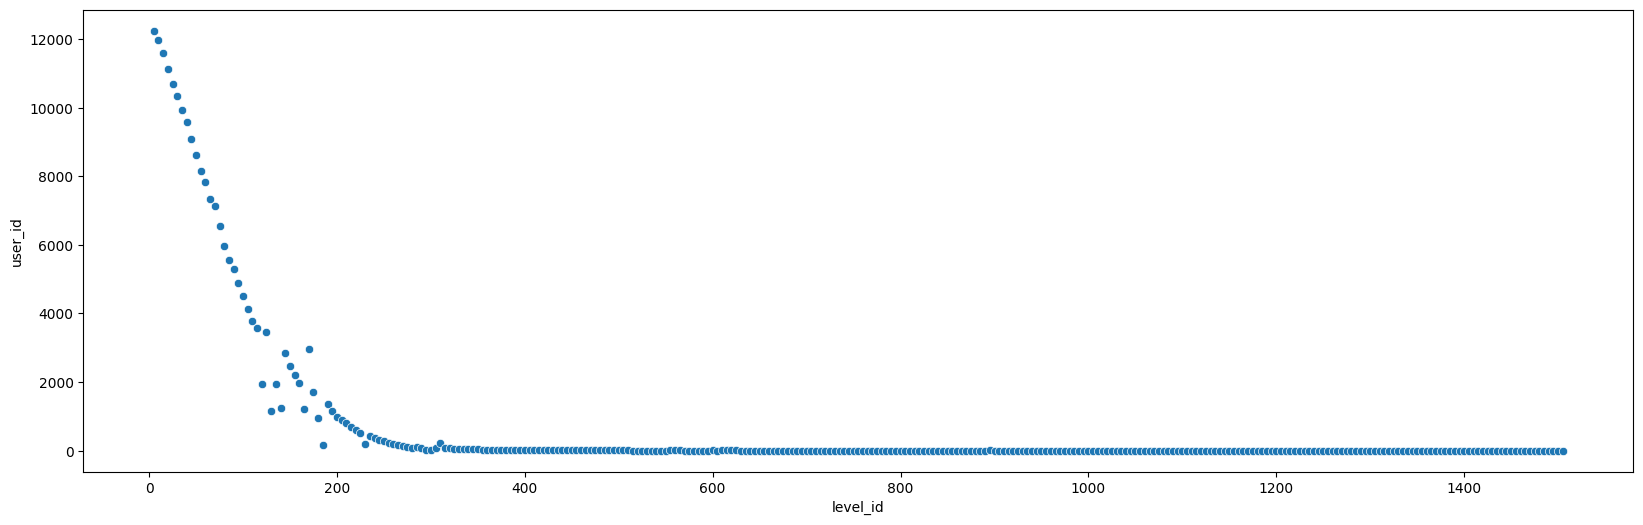

In [17]:
# calculate how many users played the game at different levels?
user = level_selection(level_seq, 0, 1509, 5)
user = user.groupby("level_id", as_index= False)["user_id"].nunique()

plt.figure(figsize=(20,6))

sns.scatterplot(
    x = "level_id",
    y = "user_id",
    data=user
)

plt.show()

The graphs shows us that we continiously lose users. However, from level 100 to 200, there is a zigzag which means we could catch some users but lost afterword. We should look different features.

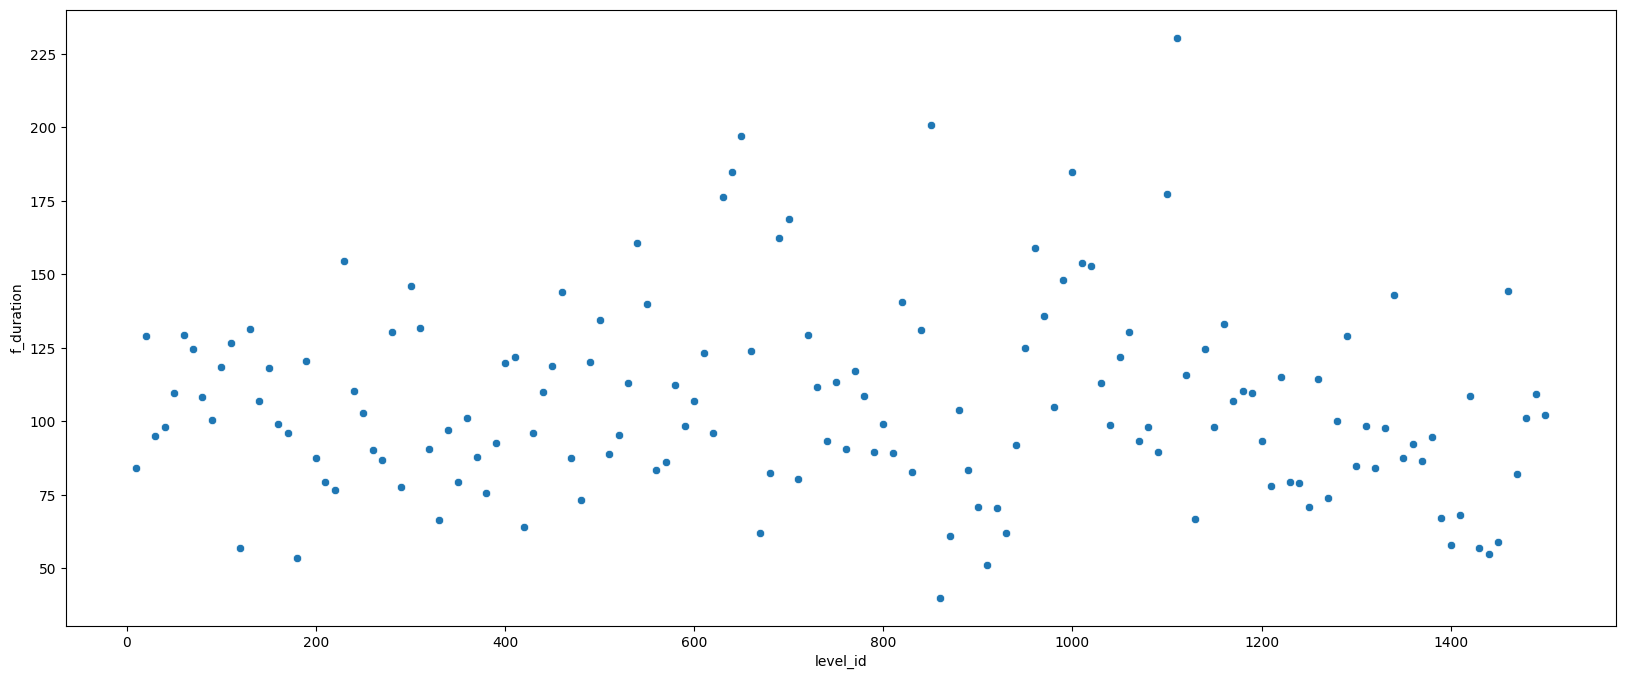

In [18]:
# What is average duration for every level?
duration = level_selection(level_seq, 0, 1509, 10)
duration = duration.groupby("level_id", as_index= False)["f_duration"].mean()

plt.figure(figsize=(20,8))

sns.scatterplot(
    x = "level_id",
    y = "f_duration",
    data=duration
)

plt.show()

We concluded that after some level, level diffucilties increasing and also number of users decreasing. Failure ratio increasing but there was not very difference in duration. Highly probably the level diffuclty affect the churn. 

In [19]:
# change time colum's type to datetime
level_seq["time"] = pd.to_datetime(level_seq["time"])
level_seq["time"]

0         2020-02-01 00:05:51
1         2020-02-01 00:08:01
2         2020-02-01 00:09:50
3         2020-02-01 00:11:16
4         2020-02-01 00:13:12
                  ...        
2194346   2020-02-03 16:26:37
2194347   2020-02-03 16:28:06
2194348   2020-02-03 16:30:17
2194349   2020-02-03 16:33:40
2194350   2020-02-03 16:35:18
Name: time, Length: 2194351, dtype: datetime64[ns]

In [20]:
# create day and hour columns
level_seq["day"] = level_seq["time"].dt.day
level_seq["hour"] = level_seq["time"].dt.hour

level_seq

,user_id,level_id,f_success,f_duration,f_reststep,f_help,time,day,hour
0,10932,1,1,127.0,0.500000,0,2020-02-01 00:05:51,1,0
1,10932,2,1,69.0,0.703704,0,2020-02-01 00:08:01,1,0
2,10932,3,1,67.0,0.560000,0,2020-02-01 00:09:50,1,0
3,10932,4,1,58.0,0.700000,0,2020-02-01 00:11:16,1,0
4,10932,5,1,83.0,0.666667,0,2020-02-01 00:13:12,1,0
...,...,...,...,...,...,...,...,...,...
2194346,10931,40,1,111.0,0.250000,1,2020-02-03 16:26:37,3,16
2194347,10931,41,1,76.0,0.277778,0,2020-02-03 16:28:06,3,16
2194348,10931,42,0,121.0,0.000000,1,2020-02-03 16:30:17,3,16
2194349,10931,42,0,115.0,0.000000,0,2020-02-03 16:33:40,3,16


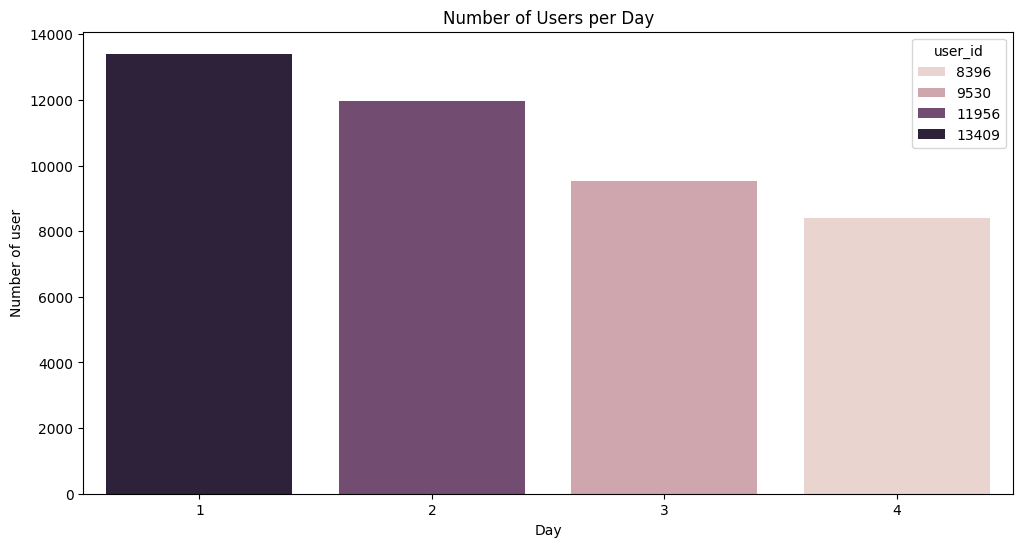

In [21]:
# calculate playing intensity on days
day = level_seq.groupby("day", as_index =False)["user_id"].nunique()

plt.figure(figsize=(12,6))

sns.barplot(
    x = "day",
    y= "user_id",
    data = day,
    hue="user_id"
)

plt.xlabel("Day")
plt.ylabel("Number of user")
plt.title("Number of Users per Day")
plt.show()

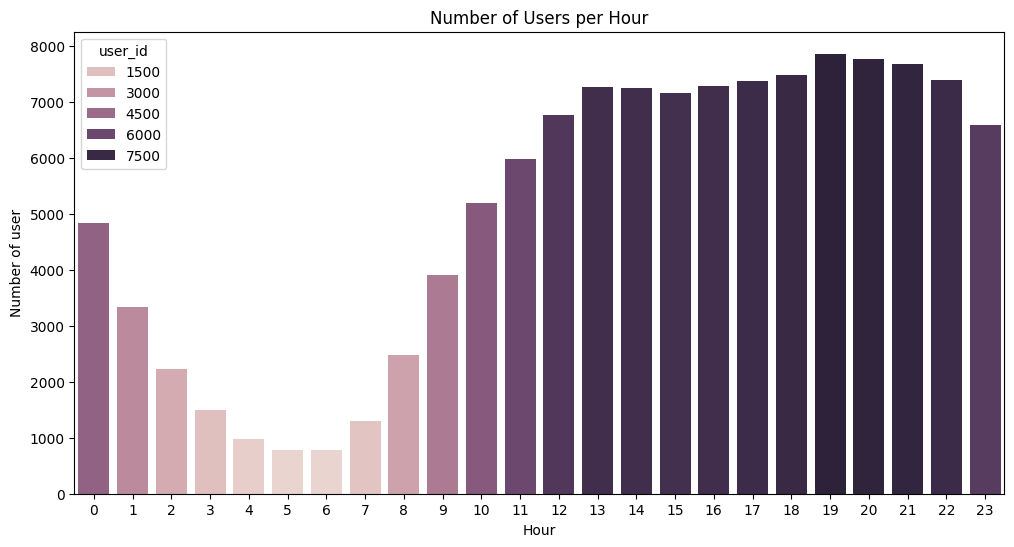

In [22]:
hour = level_seq.groupby("hour", as_index =False)["user_id"].nunique()

plt.figure(figsize=(12,6))

sns.barplot(
    x = "hour",
    y= "user_id",
    data = hour,
    hue="user_id"
)

plt.xlabel("Hour")
plt.ylabel("Number of user")
plt.title("Number of Users per Hour")
plt.show()

In [23]:
hour

,hour,user_id
0,0,4845
1,1,3331
2,2,2236
3,3,1505
4,4,979
5,5,774
6,6,777
7,7,1300
8,8,2489
9,9,3913


In [24]:
level_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194351 entries, 0 to 2194350
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int64         
 1   level_id    int64         
 2   f_success   int64         
 3   f_duration  float64       
 4   f_reststep  float64       
 5   f_help      int64         
 6   time        datetime64[ns]
 7   day         int32         
 8   hour        int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4)
memory usage: 133.9 MB


In [25]:
print(level_seq["day"].unique())

[1 2 3 4]


In [26]:
train

,user_id,label
0,2774,0
1,2775,0
2,2776,1
3,2777,0
4,2778,1
...,...,...
8153,10927,1
8154,10928,1
8155,10929,0
8156,10930,1


In [27]:
test

,user_id
0,1
1,2
2,3
3,4
4,5
...,...
2768,2769
2769,2770
2770,2771
2771,2772


In [28]:
dev

,user_id,label
0,10932,0
1,10933,1
2,10934,0
3,10935,1
4,10936,0
...,...,...
2653,13585,0
2654,13586,0
2655,13587,0
2656,13588,1
